In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Download and Unzip the dataset.

In [2]:
# url_to_the_zip_file = "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/34330/3265183/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1647437599&Signature=qVPxXAvAiFlZLpO%2Fp287NXm%2FlUOymBxRMs7NJKMGXlm3afW9PV9LuNalMJS56E%2BjsMSHh46ouLS6gNHYbyPwmdLSQiPpLQPGU6NTKTNprbDUOgYb2rqC4w6AgLOpdRh%2FGdabYAVAdjIh24Teoj5k%2Bs%2Fybm00sxAGf358%2BcxjEonvvUJDEhK7GTtv9NAFxAfsO%2F69xOWSkLEhjjnCwQ3QzfXWxbuYVnqlwy0dwQ6S%2F8iQappRaQg2%2BF9j76t1ay0B3Kg3ANj0P5EuVMDL2KVld3cQLiM7DPi9vQQV531T8snYsbiHjoE%2BhkH6w%2BWeULvu5UpDSaiVRepgtoscjgM8ig%3D%3D&response-content-disposition=attachment%3B+filename%3D2110446-data-science-and-data-engineering-2022.zip"
# new_file_name = "2110446-data-science-and-data-engineering-2022.zip"

# !rm -f "$new_file_name"
# !wget -c "$url_to_the_zip_file" -O "$new_file_name"
# !unzip "$new_file_name"

## read_csv()

In [3]:
def toDF(pm25_filename, temp_filename, wind_filename):
  pm25_df = pd.read_csv('datasci_dataset_2022/'+pm25_filename, names=['Time', 'PM25'], skiprows=1)
  pm25_df['Time'] = pd.to_datetime(pm25_df['Time'])
  # pm25_df['Time'] = pm25_df['Time'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
  # pm25_df['Time'] = pm25_df['Time'].dt.tz_localize(None)
  pm25_df.set_index('Time', inplace=True)
  pm25_df.columns = ['PM25']
  pm25_df = pm25_df[~pm25_df.index.duplicated(keep='first')]
  pm25_df.interpolate(inplace=True)
  pm25_df.index = pd.DatetimeIndex(pm25_df.index)

  temp_df = pd.read_csv('datasci_dataset_2022/'+temp_filename, names=['Time', 'Temp'], skiprows=1)
  temp_df['Time'] = pd.to_datetime(temp_df['Time'])
  temp_df.set_index(temp_df['Time'], inplace=True)
  temp_df.drop(columns={'Time'}, inplace=True)
  temp_df.columns = ['Temp']
  # pad() is similar to fillna() with forward filling
  temp_df = temp_df.resample('h').pad()
  # temp_df.index = pd.DatetimeIndex(temp_df.index)

  wind_df = pd.read_csv('datasci_dataset_2022/'+wind_filename, names=['Time', 'WindSpeed', 'WindDir'], skiprows=1)
  wind_df['Time'] = pd.to_datetime(wind_df['Time'])
  wind_df.set_index(wind_df['Time'], inplace=True)
  wind_df.drop(columns={'Time'}, inplace=True)
  wind_df.columns = ['WindSpeed', 'WindDir']
  # backward filling
  wind_df = wind_df.resample('h').bfill()
  # wind_df.index = pd.DatetimeIndex(wind_df.index)

  pm25_df['copy_index'] = pm25_df.index
  df = pd.merge(pm25_df, temp_df, left_index=True, right_index=True)
  df = pd.merge(df, wind_df, left_index=True, right_index=True)

  df = df[['Temp','WindSpeed','WindDir','PM25']]
  
  # padding first and last indices
  # df = df.ffill()
  # df = df.bfill()

  return df

In [4]:
def toDFtest(pm25_filename, temp_filename, wind_filename):
  pm25_df = pd.read_csv('datasci_dataset_2022/'+pm25_filename, names=['Time', 'PM25'], skiprows=1)
  pm25_df['Time'] = pd.to_datetime(pm25_df['Time'])
  pm25_df.set_index('Time', inplace=True)
  pm25_df.columns = ['PM25']
  pm25_df = pm25_df[~pm25_df.index.duplicated(keep='first')]
  pm25_df.index = pd.DatetimeIndex(pm25_df.index)

  temp_df = pd.read_csv('datasci_dataset_2022/'+temp_filename, names=['Time', 'Temp'], skiprows=1)
  temp_df['Time'] = pd.to_datetime(temp_df['Time'])
  temp_df.set_index(temp_df['Time'], inplace=True)
  temp_df.drop(columns={'Time'}, inplace=True)
  temp_df.columns = ['Temp']
  temp_df = temp_df.resample('h').bfill()

  wind_df = pd.read_csv('datasci_dataset_2022/'+wind_filename, names=['Time', 'WindSpeed', 'WindDir'], skiprows=1)
  wind_df['Time'] = pd.to_datetime(wind_df['Time'])
  wind_df.set_index(wind_df['Time'], inplace=True)
  wind_df.drop(columns={'Time'}, inplace=True)
  wind_df.columns = ['WindSpeed', 'WindDir']
  # backward filling
  wind_df = wind_df.resample('h').bfill()
  # wind_df.index = pd.DatetimeIndex(wind_df.index)

  pm25_df['copy_index'] = pm25_df.index
  df = pd.merge(pm25_df, temp_df, left_index=True, right_index=True)
  df = pd.merge(df, wind_df, left_index=True, right_index=True)

  df = df[['Temp','WindSpeed','WindDir','PM25']]

  return df

In [5]:
bkk_train = toDF('BKK/train/bkk_train.csv', 'BKK/train/bkk_temp_surface.csv', 'BKK/train/bkk_weather_wind.csv')
bkk_test = toDF('BKK/test/bkk_test.csv', 'BKK/test/bkk_temp_test.csv', 'BKK/test/bkk_wind_test.csv')

cnx_train = toDF('Chiangmai/train/chiangmai_train.csv', 'Chiangmai/train/chiangmai_temp_surface.csv', 'Chiangmai/train/chiangmai_weather_wind.csv')
cnx_test = toDF('Chiangmai/test/chiangmai_test.csv', 'Chiangmai/test/chiangmai_temp_test.csv', 'Chiangmai/test/chiangmai_wind_test.csv')

kkc_train = toDF('Khonkaen/train/khonkhan_train.csv', 'Khonkaen/train/khonkaen_temp_surface.csv', 'Khonkaen/train/khonkaen_weather_wind.csv')
kkc_test = toDF('Khonkaen/test/khonkhan_test.csv', 'Khonkaen/test/khonkaen_temp_test.csv', 'Khonkaen/test/khonkaen_wind_test.csv')

rayong_train = toDF('Rayong/train/rayong_train.csv', 'Rayong/train/rayong_temp_surface.csv', 'Rayong/train/rayong_weather_wind.csv')
rayong_test = toDF('Rayong/test/rayong_test.csv', 'Rayong/test/rayong_temp_test.csv', 'Rayong/test/rayong_wind_test.csv')

saraburi_train = toDF('Saraburi/train/saraburi_train.csv', 'Saraburi/train/saraburi_temp_surface.csv', 'Saraburi/train/saraburi_weather_wind.csv')
saraburi_test = toDF('Saraburi/test/saraburi_test.csv', 'Saraburi/test/saraburi_temp_test.csv', 'Saraburi/test/saraburi_wind_test.csv')

surat_train = toDF('Surat/train/surat_train.csv', 'Surat/train/surat_temp_surface.csv', 'Surat/train/surat_weather_wind.csv')
surat_test = toDF('Surat/test/surat_test.csv', 'Surat/test/surat_temp_test.csv', 'Surat/test/surat_wind_test.csv')

In [6]:
train_set={}
train_set['BKK'] = bkk_train
train_set['CNX'] = cnx_train
train_set['KKC'] = kkc_train
train_set['RAY'] = rayong_train
train_set['SARA'] = saraburi_train
train_set['SURAT'] = surat_train

test_set={}
test_set['BKK'] = bkk_test
test_set['CNX'] = cnx_test
test_set['KKC'] = kkc_test
test_set['RAY'] = rayong_test
test_set['SARA'] = saraburi_test
test_set['SURAT'] = surat_test

## Number of null values

### Before Dropping

In [7]:
null_counts_bkk_train = bkk_train.isnull().sum()
print("[bkk_train] Number of null values in each column:\n{}".format(null_counts_bkk_train))
print('\n')

null_counts_cnx_train = cnx_train.isnull().sum()
print("[cnx_train] Number of null values in each column:\n{}".format(null_counts_cnx_train))
print('\n')

null_counts_kkc_train = kkc_train.isnull().sum()
print("[kkc_train] Number of null values in each column:\n{}".format(null_counts_kkc_train))
print('\n')

null_counts_rayong_train = rayong_train.isnull().sum()
print("[rayong_train] Number of null values in each column:\n{}".format(null_counts_rayong_train))
print('\n')

null_counts_saraburi_train = saraburi_train.isnull().sum()
print("[saraburi_train] Number of null values in each column:\n{}".format(null_counts_saraburi_train))
print('\n')

null_counts_surat_train = surat_train.isnull().sum()
print("[surat_train] Number of null values in each column:\n{}".format(null_counts_surat_train))

[bkk_train] Number of null values in each column:
Temp         3
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[cnx_train] Number of null values in each column:
Temp         6
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[kkc_train] Number of null values in each column:
Temp         0
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[rayong_train] Number of null values in each column:
Temp         0
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[saraburi_train] Number of null values in each column:
Temp         0
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[surat_train] Number of null values in each column:
Temp         126
WindSpeed      0
WindDir        0
PM25           0
dtype: int64


### Drop null-valued rows (Temp & PM25)

In [8]:
bkk_train.dropna(subset=['Temp','PM25'], inplace=True)

cnx_train.dropna(subset=['Temp','PM25'], inplace=True)

kkc_train.dropna(subset=['Temp','PM25'], inplace=True)

rayong_train.dropna(subset=['Temp','PM25'], inplace=True)

saraburi_train.dropna(subset=['Temp','PM25'], inplace=True)

surat_train.dropna(subset=['Temp','PM25'], inplace=True)

## Graph Plotting

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kurtosis, skew

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)

In [10]:
def multiDisplot(dataset, col, hist=False, xlim=None):
  for prov, _ in dataset.items():
    sns.distplot(dataset[prov][col], hist=hist, label=prov)
    # print(f"{prov} {col}={dataset[prov][col].mean()}")
  plt.xlim(xlim)
  plt.legend()
  plt.show()

In [11]:
# multiDisplot(train_set, 'PM25', xlim=(-10, 120), hist=True)

In [12]:
# multiDisplot(train_set, 'Temp', hist=True)

In [13]:
# multiDisplot(train_set, 'WindDir', hist=True)

In [14]:
# multiDisplot(train_set, 'WindSpeed', hist=True)

## Handle outliers

In [15]:
class Handle_Outliers:
  def __init__(self, dataset):
    self.dataset=dataset.copy()
    self.dataShape={}

    for prov, dfcol in dataset.items():
      self.dataShape[prov] = {}
      for col, _ in dfcol.items():
        self.dataShape[prov][col] = {'Kurt':{}, 'Skew':{}}
   
  def plotIQR(self, province, col, title="", thresh=None, fig=None, subplots=None, figsize=None):
    dataset = self.dataset

    if subplots is None: subplots = [211, 212]
    if figsize is None: figsize = (10,8)


    if fig is not None:
      rows = subplots[0]//100
      cols = (subplots[0]%100)//10
      fig.add_subplot(rows, cols, subplots[0]%10)
    else:
      plt.figure(figsize=figsize)
      plt.subplot(subplots[0])

    plt.title(title)
    plt.xlim(dataset[province][col].min()/1.1, dataset[province][col].max()*1.1)
    if thresh:
      plt.axvline(x=thresh[province]['min'])
      plt.axvline(x=thresh[province]['max'])

    ax = dataset[province][col].plot(kind='kde')

    if fig is not None:
      rows = subplots[1]//100
      cols = (subplots[1]%100)//10
      fig.add_subplot(rows, cols, subplots[1]%10)
    else:
      plt.figure(figsize=figsize)
      plt.subplot(subplots[1])
      
    plt.xlim(dataset[province][col].min()/1.1, dataset[province][col].max()*1.1)
    sns.boxplot(x=dataset[province][col])

    if thresh is not None:
      plt.axvline(x=thresh[province]['min'])
      plt.axvline(x=thresh[province]['max'])

    if subplots is None:
      plt.show()

  def calcDataShape(self, province, col, verbose=0, save_slot=None):
    dataset = self.dataset

    kurtosis_value = kurtosis(dataset[province][col])
    skew_value = skew(dataset[province][col])

    if (verbose>0):
      print("\n")
      print(f"kurtosis_value = {kurtosis_value}")
      print(f"skew_value = {skew_value}")

    if (save_slot is not None):
      self.saveDataShape(province, col, kurtosis_value, skew_value, save_slot)
  
  def showDataShape(self, province, col, save_slot=None):
    dataShape = self.dataShape

    if (save_slot is not None):
      kurtosis_value = dataShape[province][col]['Kurt'][save_slot]
      skew_value = dataShape[province][col]['Skew'][save_slot]
      print(f"{save_slot}:")
      print(f"kurtosis_value = {kurtosis_value}")
      print(f"skew_value = {skew_value}")
      print("\n")

    else:
      for sav_slot, _ in dataShape[province][col]['Kurt'].items():
        kurtosis_value = dataShape[province][col]['Kurt'][sav_slot]
        skew_value = dataShape[province][col]['Skew'][sav_slot]
        print(f"{sav_slot}:")
        print(f"kurtosis_value = {kurtosis_value}")
        print(f"skew_value = {skew_value}")
        print("\n")
  
  def saveDataShape(self, province, col, kurt, skew, save_slot):
    dataShape = self.dataShape

    dataShape[province][col]['Kurt'][save_slot] = kurt
    dataShape[province][col]['Skew'][save_slot] = skew
  
  def addColumns(self, col, new_col, func):
    dataset = self.dataset
    dataShape = self.dataShape

    for prov, _ in dataset.items():
      dataset[prov][new_col] = func(dataset[prov][col])
      dataShape[prov][new_col] = {'Kurt':{}, 'Skew':{}}
  
  def calcOutliersMinMax(self, province, col, C_std):
    dataset = self.dataset

    thresh_min = dataset[province][col].mean() - C_std*dataset[province][col].std()
    thresh_min = 0 if (thresh_min<0) else thresh_min

    thresh_max = dataset[province][col].mean() + C_std*dataset[province][col].std()
    
    return thresh_min, thresh_max
  
  def setOutliersThreshold(self, province, col, new_col, thresh):
    dataset = self.dataset

    min, max = thresh[province]['min'], thresh[province]['max']

    dataset[province][new_col] = dataset[province][col]

    dataset[province].loc[dataset[province][new_col]<min, new_col] = min
    dataset[province].loc[dataset[province][new_col]>max, new_col] = max

### Using IQR to detect outliers

In [16]:
handle_outliers = Handle_Outliers(train_set)

#### Before Log

In [17]:
# handle_outliers.plotIQR('BKK', 'PM25', 'Bangkok_Train PM2.5')
# handle_outliers.calcDataShape('BKK', 'PM25', save_slot='Before')

In [18]:
# handle_outliers.plotIQR('CNX', 'PM25', "Chiangmai_Train PM2.5")
# handle_outliers.calcDataShape('CNX', 'PM25', save_slot='Before')

In [19]:
# handle_outliers.plotIQR('KKC', 'PM25', "Khonkaen_Train PM2.5")
# handle_outliers.calcDataShape('KKC', 'PM25', save_slot='Before')

In [20]:
# handle_outliers.plotIQR('RAY', 'PM25', "Rayong_Train PM2.5")
# handle_outliers.calcDataShape('RAY', 'PM25', save_slot='Before')

In [21]:
# handle_outliers.plotIQR("SARA", 'PM25', "Saraburi_Train PM2.5")
# handle_outliers.calcDataShape("SARA", 'PM25', save_slot='Before')

In [22]:
# handle_outliers.plotIQR('SURAT', 'PM25', "Surat_Train PM2.5")
# handle_outliers.calcDataShape('SURAT', 'PM25', save_slot='Before')

#### After Log

In [23]:
handle_outliers.addColumns('PM25', 'Log_PM25', lambda x: np.log(1+x))

In [24]:
# handle_outliers.plotIQR('BKK', 'Log_PM25', "Bangkok_Train Log(PM2.5)")
# handle_outliers.calcDataShape('BKK', 'Log_PM25', save_slot='After')

In [25]:
# handle_outliers.plotIQR('CNX', 'Log_PM25', "Chiangmai_Train Log(PM2.5)")
# handle_outliers.calcDataShape('CNX', 'Log_PM25', save_slot='After')

In [26]:
# handle_outliers.plotIQR('KKC', 'Log_PM25', "Khonkaen_Train Log(PM2.5)")
# handle_outliers.calcDataShape('KKC', 'Log_PM25', save_slot='After')

In [27]:
# handle_outliers.plotIQR('RAY', 'Log_PM25', "Rayong_Train Log(PM2.5)")
# handle_outliers.calcDataShape('RAY', 'Log_PM25', save_slot='After')

In [28]:
# handle_outliers.plotIQR('SARA', 'Log_PM25', "Saraburi_Train Log(PM2.5)")
# handle_outliers.calcDataShape('SARA', 'Log_PM25', save_slot='After')

In [29]:
# handle_outliers.plotIQR('SURAT', 'Log_PM25', "Surat_Train Log(PM2.5)")
# handle_outliers.calcDataShape('SURAT', 'Log_PM25', save_slot='After')

#### Set the outliers to min or max

In [30]:
# handle_outliers.showDataShape('BKK', 'PM25', 'Before')
# handle_outliers.showDataShape('BKK', 'Log_PM25')

In [31]:
thresh = {}

for prov, _ in train_set.items():
    thresh[prov] = {}
    thresh[prov]['min'], thresh[prov]['max'] = handle_outliers.calcOutliersMinMax(prov, 'Log_PM25', 3)
    handle_outliers.setOutliersThreshold(prov, 'Log_PM25', 'new_Log_PM25', thresh)

handle_outliers.addColumns('new_Log_PM25','new_PM25', lambda x: np.exp(x)-1)

##### Example 'Saraburi' : Boxplots of old and new PM2.5 after outlier handling

In [32]:
handle_outliers.dataset['SARA'].describe()

,Temp,WindSpeed,WindDir,PM25,Log_PM25,new_Log_PM25,new_PM25
count,26302.000000,26302.000000,26302.000000,26302.000000,26302.000000,26302.000000,26302.000000
mean,28.329245,21.015360,173.065546,33.852616,3.351286,3.354525,33.851236
std,4.062801,13.520995,83.727460,21.925800,0.671915,0.660619,21.777554
min,14.000000,0.000000,0.000000,1.000000,0.693147,1.335541,2.802054
25%,25.400000,11.000000,90.000000,18.000000,2.944439,2.944439,18.000000
50%,27.800000,18.000000,180.000000,29.000000,3.401197,3.401197,29.000000
75%,31.200000,28.000000,250.000000,44.000000,3.806662,3.806662,44.000000
max,40.900000,91.000000,360.000000,407.000000,6.011267,5.367030,213.225732


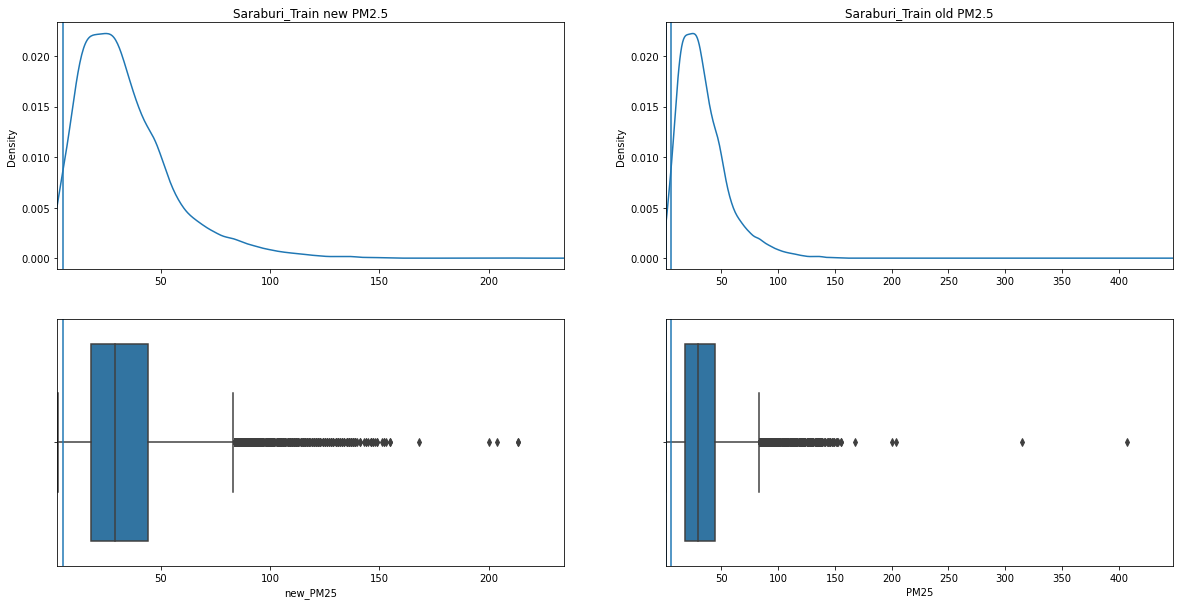

In [33]:
fig = plt.figure(figsize=(20,10))

handle_outliers.plotIQR('SARA', 'new_PM25', 'Saraburi_Train new PM2.5', thresh, fig=fig, subplots=[221, 223], figsize=(15,10))
handle_outliers.plotIQR('SARA', 'PM25', 'Saraburi_Train old PM2.5', thresh, fig=fig, subplots=[222, 224], figsize=(15,10))
plt.show()

## SARIMAX

In [34]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

import pickle
import random

from matplotlib.pyplot import figure

In [315]:
class SARIMAX_Custom():
    def __init__(self, X_train, order, seasonal_order, exog=None):
        self.X_train = X_train
        self.p, self.d, self.q = order
        self.P, self.D, self.Q, self.S = seasonal_order
        self.X_train_exog = exog
        self.params = {}
        self.params['p'] = [random.uniform(0,0.1)]*self.p
        self.params['pX'] = [random.uniform(0,0.1)]*self.X_train_exog.shape[1]
        self.params['d'] = [random.uniform(0,0.1)]*self.d
        self.params['q'] = [random.uniform(0,0.1)]*self.q
        self.params['P'] = [random.uniform(0,0.1)]*self.P if (self.P!=0) else [0]
        self.params['D'] = [random.uniform(0,0.1)]*self.D
        self.params['Q'] = [random.uniform(0,0.1)]*self.Q if (self.Q!=0) else [0]
        self.params['c'] = 1
    
    def p_prediction(self, X_train, t):
        start = max(t-self.p, 0)
        X_train_t = np.array(X_train[start:t])[::-1]
        params_p = np.array(self.params['p'][:t-start])[::-1]

        p_pred = X_train_t @ params_p

        return p_pred, X_train_t[::-1]

    def pX_prediction(self, X_train_exog, t):
        if (t==0):
            return [0], [0]
        X_train_Xt = np.array(X_train_exog[t-1])
        params_pX = np.array(self.params['pX'])

        pX_pred = X_train_Xt @ params_pX

        return pX_pred, X_train_Xt

    def d_prediction(self, diff_X, t):
        start = max(t-self.p, 0)
        diff_X_t = np.array(diff_X.iloc[t-1])
        params_d = np.array(self.params['d'][:t-start])

        d_pred = diff_X_t @ params_d

        return d_pred, diff_X_t

    def q_prediction(self, X_train, Error, t):
        start = max(t-self.q, 0)
        error_t = np.array(Error[start:t])[::-1]
        params_q = np.array(self.params['q'][:t-start])[::-1]

        q_pred = error_t @ params_q

        return q_pred, error_t[::-1]

    def P_prediction(self, X_train, t):
        ss_c = t//self.S # season_count
        if (ss_c==0 or len(self.params['P'])==0):
            return [0], [0]
        ss_c = min(ss_c, self.P)
        X_train_ts = np.array(X_train[t-self.S::-self.S])[:ss_c]
        params_P = np.array(self.params['P'][::-1])[:ss_c]
        
        P_pred = X_train_ts @ params_P

        return P_pred, X_train_ts[::-1]

    def D_prediction(self, X_train, t):
        ss_c = t-1//self.S # season_count
        if (ss_c==0 or len(self.params['D'])==0):
            return [0], [0]
        ss_c = min(ss_c, self.P)
        diff_X_ts = np.array(X_train[t-1-self.S::-self.S])[:1]
        params_D = np.array(self.params['D'])
        
        D_pred = diff_X_ts @ params_D

        return [D_pred], diff_X_ts[::-1]

    def Q_prediction(self, X_train, Error, t):
        ss_c = t//self.S # season_count
        if (ss_c==0 or len(self.params['Q'])==0):
            return [0], [0]
        ss_c = min(ss_c, self.P)
        error_ts = np.array(Error[t-self.S::-self.S])[:ss_c]
        params_Q = np.array(self.params['Q'][::-1])[:ss_c]

        Q_pred = error_ts @ params_Q.T

        return Q_pred, error_ts[::-1]
    
    def update_params(self, x, error_t, lr):
        self.params['p'] += np.pad(x['p'], (0, max(self.p - len(x['p']),0))) * error_t * lr
        self.params['pX'] += np.array(x['pX']) * error_t * lr
        self.params['d'] += np.array(x['d']) * error_t * lr
        self.params['q'] += np.pad(x['q'], (0, max(self.q - len(x['q']),0))) * error_t * lr
        self.params['P'] += np.pad(x['P'], (0, max(self.P - len(x['P']),0))) * error_t * lr
        self.params['D'] += np.array(x['D']) * error_t * lr
        self.params['Q'] += np.pad(x['Q'], (0, max(self.Q - len(x['Q']),0))) * error_t * lr
        self.params['c'] += (error_t) * lr

     
    def fit(self, verbose=0, lr=1e-5, lr_decay=0.999):
        X_train = self.X_train.iloc[:,0].copy()
        X_train = X_train.to_numpy()

        X_train_exog = self.X_train_exog.copy()
        X_train_exog = X_train_exog.to_numpy()

        diff_X = self.X_train.copy()
        for i in range(1,self.d+1):
            diff_X[f'diff{i}'] = diff_X.iloc[:,[0]].diff(periods=i)

        diff_X = diff_X.fillna(0)
        diff_X = diff_X.iloc[:,1:]

        Error = [X_train[0]-X_train.mean()]

        for t in range(1,X_train.shape[0]):
            lr *= lr_decay
            pred = {} ; x = {}
            pred['p'], x['p'] = self.p_prediction(X_train, t)
            pred['pX'], x['pX'] = self.pX_prediction(X_train_exog, t)
            pred['d'], x['d'] = self.d_prediction(diff_X, t)
            pred['q'], x['q'] = self.q_prediction(X_train, Error, t)
            pred['P'], x['P'] = self.P_prediction(X_train, t)
            pred['D'], x['D'] = self.D_prediction(X_train, t)
            pred['Q'], x['Q'] = self.Q_prediction(X_train, Error, t)

            # y_pred = p_pred.sum() + q_pred.sum() + P_pred.sum() + Q_pred.sum() + self.params['c']
            pred['y'] = (pred['p'] + pred['pX'] + pred['q'] + pred['P'] + pred['Q'] + self.params['c']).sum()

            error_t = X_train[t] - pred['y']

            if (verbose):
                print(t, pred['y'], X_train[t], error_t, lr)

            Error.append(error_t)


            self.update_params(x, error_t, lr)
        

        return Error
    
    def predict(self, y, y_X, start_date, t_forecast=1, y_exog=None, verbose=0):
        y_t = y.iloc[:,0].copy()
        y_t = y_t.to_numpy()
        
        y_t = y.iloc[:,0].copy()
        y_t = y_t.to_numpy()

        y_Xt = y_X.to_numpy()

        Error = [y_t[0]-10]

        y_pred = [10]

        for t in range(1,len(y_t)):
            pred = {} ; x = {}
            pred['p'], x['p'] = self.p_prediction(y_t, t)
            pred['pX'], x['pX'] = self.pX_prediction(y_Xt, t)
            pred['q'], x['q'] = self.q_prediction(y_t, Error, t)
            pred['P'], x['P'] = self.P_prediction(y_t, t)
            pred['Q'], x['Q'] = self.Q_prediction(y_t, Error, t)

            pred['y'] = (pred['p'] + pred['pX'] + pred['q'] + pred['P'] + pred['Q'] + self.params['c']).sum()
            
            y_pred.append(pred['y'])

            error_t = y_t[t] - pred['y']

            if (verbose):
                print(t, pred['y'], y_t[t], error_t)

            Error.append(error_t)
        
        y_pred_tmp = y.iloc[:,[0]].copy()
        y_pred_tmp['PM25'] = np.array(y_pred)
        
        return y_pred_tmp, Error
    
    def RMSE(self, y_test, y_pred):
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        print(f'Test on SARIMAX with RMSE: {rmse}')
    
    def plot(self, dataset, y_pred, title=""):
        figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
        plt.plot(dataset, color='g',label='ground truth')
        plt.plot(y_pred, alpha=.7, color='r',label='predict')
        plt.title(title)
        plt.legend(loc="upper right")

        plt.show()

In [316]:
cnx_train_tmp = handle_outliers.dataset['CNX'][['new_PM25', 'Temp', 'WindSpeed', 'WindDir']]
cnx_train_tmp.rename(columns={'new_PM25':'PM25'}, inplace=True)
cnx_train_tmp = cnx_train_tmp.resample('6H').mean()
cnx_test = test_set['CNX']
cnx_test = cnx_test.resample('6H').mean()
cnx_test.shape

(1464, 4)

In [317]:
bkk_train_tmp = handle_outliers.dataset['BKK'][['new_PM25', 'Temp', 'WindSpeed', 'WindDir']]
bkk_train_tmp.rename(columns={'new_PM25':'PM25'}, inplace=True)
bkk_train_tmp = bkk_train_tmp.resample('6H').mean()
bkk_test = test_set['BKK']
bkk_test = bkk_test.resample('6H').mean()
bkk_test.shape

(1464, 4)

In [318]:
cnx_train_size, cnx_valid_size = 7*cnx_train_tmp.shape[0]//10, 3*cnx_train_tmp.shape[0]//10

cnx_train, cnx_valid = cnx_train_tmp.iloc[:cnx_train_size], cnx_train_tmp.iloc[cnx_train_size: ]

bkk_train_size, bkk_valid_size = 7*bkk_train_tmp.shape[0]//10, 3*bkk_train_tmp.shape[0]//10

bkk_train, bkk_valid = bkk_train_tmp.iloc[:bkk_train_size], bkk_train_tmp.iloc[bkk_train_size: ],

In [319]:
cnx_train.head(20)

,PM25,Temp,WindSpeed,WindDir
Time,,,,
2017-07-01 00:00:00,11.800000,22.840000,30.400000,247.000000
2017-07-01 06:00:00,14.333333,25.633333,27.000000,246.666667
2017-07-01 12:00:00,12.500000,30.583333,23.000000,243.333333
2017-07-01 18:00:00,16.666667,26.200000,26.000000,259.166667
2017-07-02 00:00:00,14.833333,23.066667,22.333333,249.166667
2017-07-02 06:00:00,13.833333,26.033333,19.333333,246.666667
2017-07-02 12:00:00,14.166667,31.066667,25.500000,237.500000
2017-07-02 18:00:00,16.666667,26.000000,32.000000,260.000000
2017-07-03 00:00:00,12.833333,22.833333,31.666667,277.500000


In [320]:
cnx_test

,Temp,WindSpeed,WindDir,PM25
Time,,,,
2020-07-01 00:00:00,23.760000,22.200000,274.000000,11.800000
2020-07-01 06:00:00,25.850000,20.333333,260.833333,12.666667
2020-07-01 12:00:00,31.133333,22.166667,248.333333,11.166667
2020-07-01 18:00:00,26.333333,26.000000,269.166667,15.000000
2020-07-02 00:00:00,23.233333,22.166667,274.166667,9.500000
...,...,...,...,...
2021-06-30 18:00:00,25.833333,24.333333,264.166667,15.000000
2021-07-01 00:00:00,22.650000,26.333333,270.000000,14.333333
2021-07-01 06:00:00,22.883333,17.833333,259.166667,13.416667


In [321]:
best_order = (4, 0, 2)
best_seasonal_order = (1, 0, 1, 1461) # 365.25 * 4

exog_columns = ['Temp', 'WindSpeed', 'WindDir']

In [322]:
model_cnx = SARIMAX_Custom(cnx_train[['PM25']],
              best_order,
              best_seasonal_order,
              exog=cnx_train[exog_columns])

model_bkk = SARIMAX_Custom(bkk_train[['PM25']],
              best_order,
              best_seasonal_order,
              exog=bkk_train[exog_columns])

In [323]:
cnx_ERR = model_cnx.fit(lr=1e-5, lr_decay=0.999 ,verbose=0)
bkk_ERR = model_bkk.fit(lr=1e-5, lr_decay=0.999 ,verbose=0)

In [324]:
# def predict(self, x, y, start_date, t_forecast=1, y_exog=None, verbose=0):

In [325]:
df_test = cnx_test[['PM25']].iloc[:,0].copy()

In [326]:
# y_t = df_test.to_numpy()

# Error = [y_t[0]-10]

# y_pred = [10]

# for t in range(1,len(y_t)):
#     pred = {} ; x = {}
#     pred['p'], x['p'] = model_cnx.p_prediction(y_t, t)
#     pred['q'], x['q'] = model_cnx.q_prediction(y_t, Error, t)
#     pred['P'], x['P'] = model_cnx.P_prediction(y_t, t)
#     pred['Q'], x['Q'] = model_cnx.Q_prediction(y_t, Error, t)

#     pred['y'] = (pred['p'] + pred['q'] + pred['P'] + pred['Q'] + model_cnx.params['c']).sum()
    
#     y_pred.append(pred['y'])

#     error_t = y_t[t] - pred['y']

#     print(t, pred['y'], y_t[t], error_t)

#     Error.append(error_t)

# y_pred_tmp = y.iloc[:,[0]].copy()
# y_pred_tmp['PM25'] = np.array(y_pred)

In [327]:
model_cnx.params

{'p': array([0.21033884, 0.09788719, 0.04923555, 0.15537244]),
 'pX': array([ 0.15142467,  0.10326464, -0.00586904]),
 'd': array([], dtype=float64),
 'q': array([0.03211666, 0.16640901]),
 'P': array([0.05197559]),
 'D': array([], dtype=float64),
 'Q': array([0.0610506]),
 'c': 1.0028450841931384}

In [328]:
model_bkk.params

{'p': array([0.1816184 , 0.11818149, 0.11960634, 0.23684009]),
 'pX': array([ 0.17870819,  0.07923047, -0.02185037]),
 'd': array([], dtype=float64),
 'q': array([0.0401874 , 0.19839081]),
 'P': array([0.07035136]),
 'D': array([], dtype=float64),
 'Q': array([-0.00686154]),
 'c': 1.0050073804237813}

In [329]:
cnx_y_pred, _ = model_cnx.predict(cnx_test[['PM25']], cnx_test[exog_columns], start_date=0)
bkk_y_pred, _ = model_bkk.predict(bkk_test[['PM25']], bkk_test[exog_columns], start_date=0)

In [330]:
model_cnx.RMSE(cnx_y_pred['PM25'], cnx_test['PM25'])

Test on SARIMAX with RMSE: 12.204526670254655


In [331]:
model_bkk.RMSE(bkk_y_pred['PM25'], bkk_test['PM25'])

Test on SARIMAX with RMSE: 4.6332203993041485


In [332]:
cnx_data = pd.concat((cnx_train, cnx_valid, cnx_test), axis=0)
bkk_data = pd.concat((bkk_train, bkk_valid, bkk_test), axis=0)

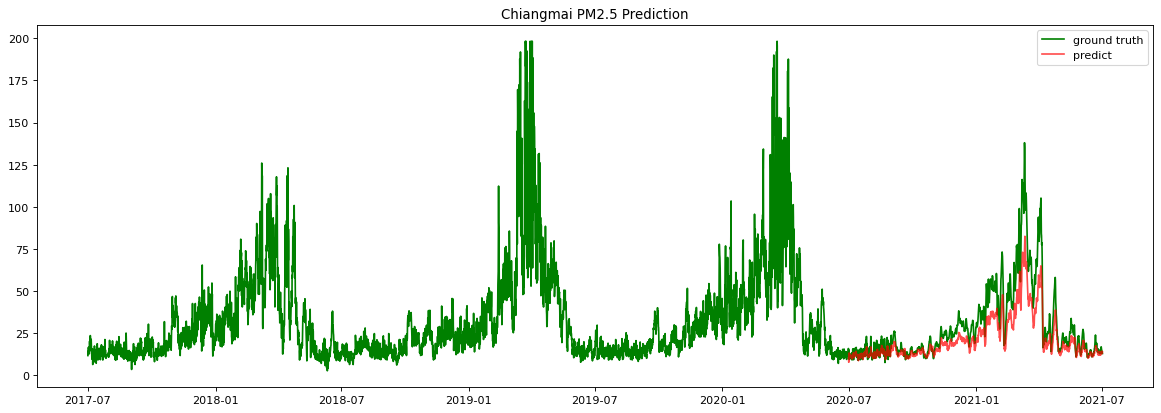

In [333]:
model_cnx.plot(cnx_data['PM25'], cnx_y_pred['PM25'], "Chiangmai PM2.5 Prediction")

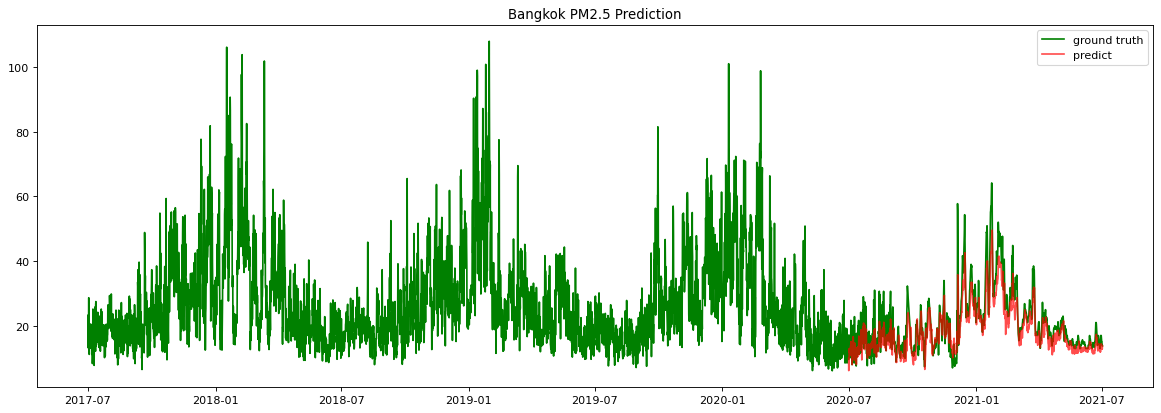

In [334]:
model_bkk.plot(bkk_data['PM25'], bkk_y_pred['PM25'], "Bangkok PM2.5 Prediction")

In [335]:
# # Open file - Write binary mode
# model_file = open('mod_cnx[0-1-1_1-1-0-365].model', 'wb')

# # Save Decision tree model
# pickle.dump(mod_cnx, model_file)

# # Close file
# model_file.close()

In [336]:
# test_exog = pd.concat((cnx_valid[exog_columns], cnx_test[exog_columns]), axis=0)

In [337]:
# bkk_data = pd.concat((bkk_train, cnx_valid, bkk_test), axis=0)

# Grid Search

In [338]:
# from sklearn.model_selection import GridSearchCV